# Module 1: Introduction to Exploratory Analysis 

## Step 2:  Data Cleaning

A big part of exploratory analysis involves data validation. This means gaining an understanding of the distribution of data, any potential data issues that can affect the quality of your model. As we learnt during our theory lesson, " Data preparation accounts for about 80% of the work of data scientists.” [source](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#27df67b36f63).

What does data cleaning look like:

#### 1) Are my variables the right type?

Type is very important in Python programing, because it affects the types of functions you can apply to a series. There are a few different types of data you will see regularly (see [this](https://en.wikibooks.org/wiki/Python_Programming/Data_Types) link for more detail):
* **int** - a number with no decimal places. example: loan_amount field
* **float** - a number with decimal places. example: partner_id field
* **str** - str is short for string. This type formally defined as a sequence of unicode characters. More simply, string means that the data is treated as a word, not a number. example: sector
* **boolean** - can only be True or False. There is not currently an example in the data, but we will be creating a gender field shortly.
* **datetime** - values meant to hold time data. Example: posted_date

#### 2) Is there missing data?

If we have missing data, is the missing data at random or not at random? If data is missing at random, the data distribution is still representative of the population. You can probably ignore the missing values as an inconvienience. However, if the data is missing systematically, any modeling you do may be biased. You should carefully consider the best way to clean the data, it may involve dropping some data. See [here](https://en.wikipedia.org/wiki/Missing_data) for additional information.

#### 3) Sanity check the data, does it match what you expected to find:
- is the range of values what you would expect. For example, are all loan_amounts above 0.
- do you have the number of rows you would expect
- is your data for the date range you would expect. For example, is there a strange year in the data like 1880.
- are there unexpected spikes when you plot the data over time


In this section, we will go over all these steps:

 1)  **Checking variable type**
   
 2)  **Checking for missing variables**
   
 3)  **Number of observations in the dataset**
   
 4)  **Descriptive statistics**

### Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import dateutil.parser

# The command below means that the output of multiple commands in a cell will be output at once
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The command below tells jupyter to display up to 80 columns, this keeps everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

### Import dataset

We read in our merged dataset below. Don't forget to update the name with your own! 

In [2]:
data_path = 'C://Users/JANE_DOE/Desktop/intro_course_data_science_for_good/data'
data_path = 'C:/Users/kevin pan/Dropbox/dev/kiva_/input'
df = pd.read_csv(data_path+'/df.csv', low_memory=False)

In the cell below, we take a random sample of 2 rows to get a feel for the data.

In [3]:
df.sample(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,...,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url,posted_datetime,funded_datetime,planned_expiration_datetime,dispursal_datetime,number_of_loans,dispersal_date,posted_year,posted_month,time_to_fund
95810,105444,105444,105386,Used Clothing,NaN,False,"[{'first_name': 'Samson', 'last_name': '', 'ge...",NaN,['en'],"Samson is 57 years old, married, and has six c...",NaN,NaN,NaN,550,2011-12-30,357392,917362,1,0,0,18,550,Kenya,KE,country,1 38,point,NaN,Samson,142.0,[],NaN,2011-12-01,Clothing,funded,[],50000.0,KES,2011-11-11T08:00:00Z,550,...,NaN,Brian Arens,NaN,to buy more clothes to sell.,NaN,NaN,NaN,NaN,1,54.8,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.024923,0.619151,NaN,0.000000,NaN,2081410.0,1.0,0.000000,5945.0,Faulu Kenya,41.0,NaN,NaN,0.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2009-07-19T04:30:05Z,closed,2892775.0,http://www.faulukenya.com/,2011-12-01 08:00:54,2011-12-30 22:16:53,NaN,2011-11-11 08:00:00,1,2011-11-11,2011,12,29.0
112473,122115,122115,122057,General Store,NaN,True,"[{'first_name': 'Joshua', 'last_name': '', 'ge...",NaN,['en'],"Joshua N. K. is twenty two years old, married ...",NaN,NaN,NaN,275,2010-04-05,187168,511219,1,0,0,3,275,Kenya,KE,town,1 38,point,Thika,Joshua,138.0,[],NaN,2010-04-01,Retail,funded,[],20000.0,KES,2010-03-03T08:00:00Z,275,...,NaN,Jacqueline Pittenger,278831.0,"Flour, sugar, rice, soap etc.",NaN,NaN,NaN,NaN,1,40.1,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.214680,1.483890,NaN,10.519745,NaN,328197.0,1.0,18.498507,17262.0,SMEP Microfinance Bank,29.0,NaN,0.0,3.5,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2009-07-19T04:50:04Z,active,6764500.0,http://www.smep.co.ke/index.php,2010-04-01 07:00:26,2010-04-05 22:09:44,NaN,2010-03-03 08:00:00,1,2010-03-03,2010,4,4.0


### 1) Are my variables the right type?

Let's check the type of our variables using the examples we saw in the cell above.

In [4]:
## Select variables by name
type_example = df[['loan_amount','partner_id', 'sector','posted_date']]
## Pull (3) random rows
type_example.sample(3)

,loan_amount,partner_id,sector,posted_date
41231,275,133.0,Agriculture,2015-05-29
50591,1225,202.0,Agriculture,2014-12-01
60307,350,164.0,Food,2014-03-16


In [5]:
## Check the first cell for a column
df['posted_datetime'].head(1)
## Check the datatype for a single column
df['posted_datetime'].dtype

0    2017-05-09 00:40:03
Name: posted_datetime, dtype: object

dtype('O')

Datatype 'O' is for object.

### 2) Do I have missing values?

We want to see how many values are missing in certain variable columns. One way to do this is to count the number of null observations. 

For this, we wrote a short function to apply to the dataframe. 

We print out the first few observations, but you can remove the .head() to print out all columns. 

In [29]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
## Check how many are missing by column, and then check which ones have any missing values
print(df.apply(num_missing, axis=0).where(lambda x : x != 0).dropna().head(20)) 
#axis=0 defines that function is to be applied on each column

Missing values per column:
basket_amount                                           117372.0
currency_exchange_loss_amount                           102626.0
description.texts.en                                      4328.0
description.texts.es                                    118313.0
description.texts.fr                                    118313.0
description.texts.ru                                    118312.0
funded_date                                               5612.0
location.town                                             7909.0
planned_expiration_date                                  24913.0
terms.loss_liability.currency_exchange_coverage_rate      3869.0
terms.repayment_interval                                117372.0
themes                                                   89302.0
translator.byline                                        35954.0
translator.image                                         55299.0
use                                                       4327.

In [28]:
#Applying per row:
print("\nMissing values per row:")
missing_by_row = df.apply(num_missing, axis=1) 
#axis=1 defines that function is to be applied on each row
print(missing_by_row.head()) 


Missing values per row:
0    15
1    15
2    14
3    15
4    16
dtype: int64


Remember when we used a left join to merge in the partner data. That means we could have null (missing) values in our partner_id field. We check this in the cell below and find that we have 9,642 loans that are missing. Let's investigate and try and understand whether the data is missing at random or systematically missing.

In [8]:
null_basket_amount = df.loc[df['basket_amount'].isnull()]
len(null_basket_amount)
null_basket_amount.head(2)

117372

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_amount,funded_date,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_amount,terms.disbursal_currency,terms.disbursal_date,terms.loan_amount,...,themes,translator.byline,translator.image,use,video.id,video.thumbnailImageId,video.title,video.youtubeId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url,posted_datetime,funded_datetime,planned_expiration_datetime,dispursal_datetime,number_of_loans,dispersal_date,posted_year,posted_month,time_to_fund
16,16,16,16,Primary/secondary school costs,NaN,False,"[{'first_name': 'Sally ', 'last_name': '', 'ge...",NaN,['en'],"Sally is an ambitious woman from Bomet, a maiz...",NaN,NaN,NaN,150,2017-05-09,1291449,2515878,1,0,0,6,150,Kenya,KE,town,1 38,point,Bomet,Sally,156.0,[],2017-06-07,2017-05-08,Education,funded,"[{'name': '#Parent'}, {'name': '#Schooling'}]",15000.0,KES,2017-05-28T07:00:00Z,150,...,NaN,NaN,NaN,to pay school fees for her children.,NaN,NaN,NaN,NaN,1,49.6,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.431935,2.575299,NaN,2.536684,NaN,1834079.0,1.0,24.200354,18150.0,Juhudi Kilimo,33.0,NaN,-7.10,2.0,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2010-01-15T20:20:17Z,active,7705925.0,http://www.juhudikilimo.com/,2017-05-08 22:30:06,2017-05-09 00:37:46,2017-06-07 22:30:06,2017-05-28 07:00:00,1,2017-05-28,2017,5,0.0
21,21,21,21,Celebrations,NaN,False,"[{'first_name': 'Naomi', 'last_name': '', 'gen...",NaN,['en'],Naomi is a single mother of 2 children and she...,NaN,NaN,NaN,100,2017-05-08,1291404,2515811,1,0,0,4,100,Kenya,KE,town,1 38,point,nyeri,Naomi,386.0,[],2017-06-07,2017-05-08,Personal Use,funded,"[{'name': '#Animals'}, {'name': '#Parent'}, {'...",10000.0,KES,2017-04-03T07:00:00Z,100,...,NaN,Cheryl Strecker,1412668.0,to buy a goat for a celebration during the Eas...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.000000,NaN,7.017031,NaN,1592272.0,1.0,21.165398,1948.0,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375.0,http://www.eclof-kenya.org/,2017-05-08 22:10:05,2017-05-08 23:01:45,2017-06-07 22:10:05,2017-04-03 07:00:00,1,2017-04-03,2017,5,0.0


It seems that the number of loans peaked in 2014, and has decreased. All of the loans issued in the second half of 2015, 2016, 2017 have a partner. This tells us these values are not missing at random, they are more likely to occur in data before June 2015, and are most likely to occur in the first half of 2014. We should probably just drop data with the partner_id missing. We do so below using the notnull() function which checks if the field is populated.

In [17]:
df = df.loc[df['partner_id'].notnull()]

As a sanity check that our filtering was correctly done we check the new number of rows. It makes sense!

In [18]:
len(df.index)

118316

### 3) Sanity Checks

**Does the dataset have the number of rows you would expect?**

In the command below we find out the number of loans and number of columns by using the function shape. You can also use len(df.index) to find the number of rows.

In [10]:
print('There are %d observations and %d features' % (df.shape[0],df.shape[1]))

There are 118316 observations and 87 features


This tells us there are 118,316 observations and 84 features. We learnt in the theory lesson that each row is an observation and each column is a potential feature. 118,000 matches with what we expect based upon our conversations with Kiva. This is a very healthy sample size for applying machine learning algorithms.

### Descriptive statistics of the dataset

In Module 1, we learned about mean, frequency and percentiles as a powerful way to understand the distribution of the data. If you are unfamiliar with these terms or need a refresher [this](https://www.mathsisfun.com/data/frequency-grouped-mean-median-mode.html) overview should be helpful. The "describe" command below provides key summary statistics for each numeric column.

In [11]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,basket_amount,currency_exchange_loss_amount,funded_amount,id,image.id,image.template_id,journal_totals.bulkEntries,journal_totals.entries,lender_count,loan_amount,partner_id,terms.disbursal_amount,terms.loan_amount,terms.loss_liability.currency_exchange_coverage_rate,terms.repayment_term,translator.image,video.id,video.thumbnailImageId,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image.id,partner_image.template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_total_amount_raised,number_of_loans,posted_year,posted_month,time_to_fund
count,118316.000000,118316.000000,118316.000000,944.000000,15690.000000,118316.000000,1.183160e+05,1.183160e+05,118316.0,118316.0,118316.0,118316.000000,118316.000000,118316.000000,1.183160e+05,118316.000000,114447.000000,118316.000000,6.301700e+04,76.000000,7.600000e+01,118316.000000,118316.000000,118316.000000,118316.000000,0.0,118316.000000,0.0,1.183160e+05,118316.0,118316.000000,118316.000000,111917.000000,0.0,106890.000000,1.183160e+05,118316.0,118316.000000,118316.000000,112704.000000
mean,64433.371843,64433.371843,64398.230239,0.185381,7.017447,473.439771,7.096035e+05,1.540915e+06,1.0,0.0,0.0,14.608227,495.159784,165.037552,4.178579e+04,495.159784,0.122154,13.461079,1.165835e+06,1291.697368,6.155305e+05,1.930686,30.026747,0.212524,3.821426,NaN,4.358150,NaN,1.496709e+06,1.0,11.528738,18174.752434,31.054133,NaN,2.362943,7.309958e+06,1.0,2013.558783,6.424904,7.575046
std,38178.638548,38178.638548,38157.158427,2.145937,15.655207,676.663803,3.412929e+05,6.043467e+05,0.0,0.0,0.0,20.216517,704.079168,66.001909,4.474124e+04,704.079168,0.041529,8.147379,7.036716e+05,1027.999559,4.622450e+05,3.031490,17.099929,0.262458,10.477770,NaN,5.472373,NaN,6.022014e+05,0.0,10.893620,9423.900289,10.444965,NaN,11.299052,3.289116e+06,0.0,2.343340,3.559524,12.299220
min,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,2.510000e+02,4.090000e+02,1.0,0.0,0.0,0.000000,25.000000,6.000000,2.500000e+01,25.000000,0.100000,2.000000,2.392400e+04,150.000000,2.975740e+05,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,3.560000e+02,1.0,0.000000,0.000000,0.000000,NaN,-117.790000,0.000000e+00,1.0,2006.000000,1.000000,-442.000000
25%,29578.750000,29578.750000,29564.750000,0.000000,1.220000,250.000000,4.202852e+05,1.013473e+06,1.0,0.0,0.0,7.000000,250.000000,133.000000,2.000000e+04,250.000000,0.100000,11.000000,5.186710e+05,487.750000,3.244948e+05,1.000000,24.300000,0.089354,0.085473,NaN,0.000000,NaN,1.495190e+06,1.0,0.000000,9546.000000,29.000000,NaN,-1.700000,6.764500e+06,1.0,2012.000000,3.000000,0.000000
50%,66559.500000,66559.500000,66517.500000,0.000000,3.490000,350.000000,6.975760e+05,1.575774e+06,1.0,0.0,0.0,11.000000,375.000000,156.000000,3.000000e+04,375.000000,0.100000,14.000000,1.186147e+06,665.500000,3.361080e+05,1.000000,34.900000,0.164711,1.483890,NaN,2.536684,NaN,1.592689e+06,1.0,16.058249,18150.000000,33.100000,NaN,0.000000,7.646925e+06,1.0,2014.000000,6.000000,2.000000
75%,98296.250000,98296.250000,98238.250000,0.000000,8.280000,600.000000,1.003961e+06,2.052755e+06,1.0,0.0,0.0,18.000000,600.000000,164.000000,5.000000e+04,600.000000,0.100000,14.000000,1.668411e+06,2154.250000,6.247900e+05,1.000000,40.100000,0.364948,3.652283,NaN,8.017062,NaN,2.081410e+06,1.0,18.498507,21415.000000,36.000000,NaN,2.230000,8.133425e+06,1.0,2016.000000,10.000000,13.000000
max,127957.000000,127957.000000,127899.000000,25.000000,1285.510000,50000.000000,1.292273e+06,2.516905e+06,1.0,0.0,0.0,1589.000000,50000.000000,526.000000,1.596948e+06,50000.000000,0.200000,122.000000,2.499150e+06,3008.000000,1.754457e+06,46.000000,54.800000,7.513861,94.939083,NaN,100.000000,NaN,2.520600e+06,1.0,100.000000,30794.000000,41.000000,NaN,30.300000,1.136698e+07,1

In order to get the same summary statistics for categorical columns (string) we need to do a little data wrangling. The first line of code filters for all columns that are a data type object. As we know from before this means they are considered to be a string. The final row of code provides summary statistics for these character fields.

In [12]:
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].describe()

,activity,borrowers,description.languages,description.texts.en,description.texts.es,description.texts.fr,description.texts.ru,funded_date,location.country,location.country_code,location.geo.level,location.geo.pairs,location.geo.type,location.town,name,payments,planned_expiration_date,posted_date,sector,status,tags,terms.disbursal_currency,terms.disbursal_date,terms.local_payments,terms.loss_liability.currency_exchange,terms.loss_liability.nonpayment,terms.repayment_interval,terms.scheduled_payments,themes,translator.byline,use,video.title,video.youtubeId,partner_countries,partner_name,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_url,posted_datetime,funded_datetime,planned_expiration_datetime,dispursal_datetime,dispersal_date
count,118316,118316,118316,113988,3,3,4,112704,118316,118316,118316,118316,118316,110407,118316,118316,93403,118316,118316,118316,118316,118316,118316,118316,118316,118316,944,118316,29014,82362,113989,76,76,118316,118316,118316,113754,118316,118316,114249,118316,112704,93403,118316,118316
unique,149,29987,4,113859,3,3,4,3452,1,1,2,47,1,1249,16047,1,1860,3174,15,3,5426,2,5413,736,3,2,3,277,27,425,58864,72,74,11,52,9,16,52,3,34,80932,106844,64140,5413,3081
top,Farming,"[{'first_name': 'Anonymous', 'last_name': '', ...",['en'],"Hello Kiva Community! <br /><br />Meet Jane, w...","Beatrice is 51 years old, married and supports...","Teresia is 37 years old, married and together ...",Gerald is a married man. He has 2 children. He...,2016-03-08,Kenya,KE,town,1 38,point,Likoni,Anonymous,[],2014-03-26,2014-02-24,Agriculture,funded,[],KES,2017-02-01T08:00:00Z,[],shared,lender,Monthly,[],['Rural Exclusion'],Tim Gibson,to purchase a solar light and gain access to c...,Kiva Borrower PETRE from Kenya,thgCQSzTxdw,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",VisionFund Kenya,3.5,"[{'id': 1, 'name': 'Anti-Poverty Focus', 'desc...",2009-05-29T11:35:11Z,active,http://www.visionfundkenya.co.ke/,2011-01-01 08:00:08,2005-03-31 06:27:55,2014-01-01 01:44:31,2017-02-01 08:00:00,2017-02-01
freq,26243,2420,118306,5,1,1,1,413,118316,118316,110407,77254,118316,5035,3680,118316,621,621,45638,112704,65318,115076,2498,117372,113783,115735,622,117372,15663,6917,1405,2,2,106639,28570,39681,46681,28570,104271,28570,52,24,21,2498,2498


In the table above, there are 4 really useful fields: 

1) **count** - total number of fields populated (Not empty). 

2) **unique** - tells us how many different unique ways this field is populated. For example 4 in description.languages tells us there are 4 different language descriptions. 

3) **top** - tells us the most popular data point. For example, the top activity in this dataset is Farming which tells us most loans are in Farming.

4) **freq** - tells us that how frequent the most popular category is in our dataset. For example, 'en' (english) is the language almost all descriptions (description.languages) are written in (118,306 out of 118,316).

One red flag from the table above is the summary statistics for the field location.geo.pairs. It seems that 77,254 loans come from the same latitude and longitude. Given the granularity of coordinates this seems highly unlikely. Let's investigate further. Below we plot the geo coordinate field.

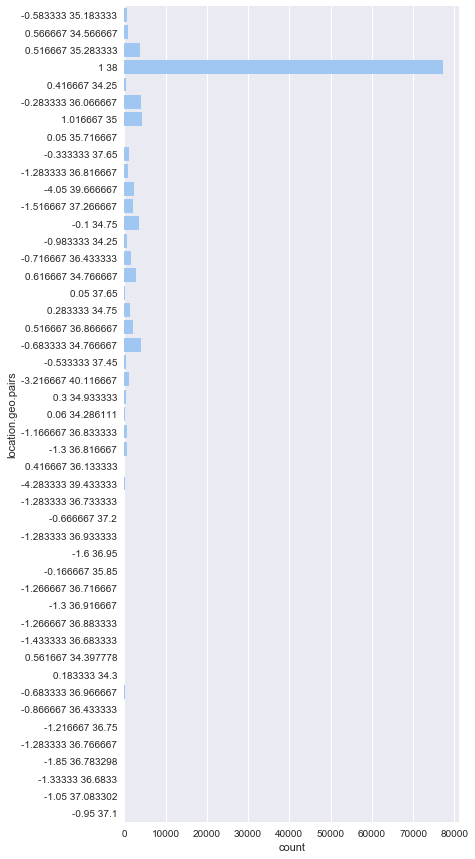

In [18]:
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot
sns.countplot(y="location.geo.pairs", data=df,
              label="Count", color="b")

It looks like many loans are coming from a particular set of geo coordinates. Seems very strange, but perhaps it is possible. Let's take a look at another field location.town which has the name of the town where the loan is from which should help clarify.

Likoni     5035
Kitale     4396
Kisii      4025
Nakuru     3975
Eldoret    3833
Name: location.town, dtype: int64

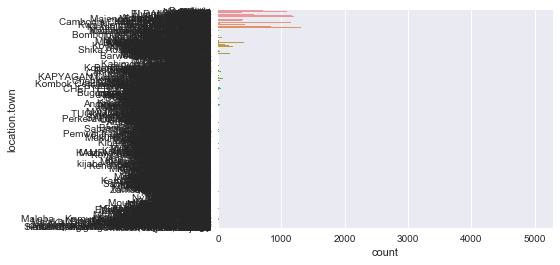

In [23]:
sns.countplot(y = 'location.town', data = df)
df['location.town'].value_counts().head()

The messy chart above actually makes a lot more sense given what we would expect! It shows that loans disbursed across many different towns and are not concentrated in a single location. We now suspect there is a data issue with location.geo.pairs. We talk to our partners at Kiva and they confirm that this data field is problematic, we will not use it going forward and will instead use location.town.

### Moving on

Next we move on to feature engineering, where we create variables from what we've found.